# Heart Failure Prediction

## {NOT DONE} General Information About Heart Disease

# 1. Load Libraries

In [4]:
# Importing the initial required libraries

import numpy as np
# This is for nparray calculation which is 50x faster than list
import pandas as pd
# This is for DataFrame and data manipulation and analysis
import matplotlib.pyplot as plt
# A collection of command style functions that make matplotlib work like MATLAB
import seaborn as sns
# Visualize data using pair plots that produce a matrix of relationships between each variable in the dataset
from sklearn.model_selection import train_test_split
# To split the dataset for training and testing
from sklearn import metrics
# For checking the model accuracy

## (Extra) Load Libraries (With Version Printout)

In [1]:
# Importing the initial required libraries

import numpy as np
# This is for nparray calculation which is 50x faster than list
import pandas as pd
# This is for DataFrame and data manipulation and analysis
import matplotlib.pyplot as plt
# A collection of command style functions that make matplotlib work like MATLAB
import seaborn as sns
# Visualize data using pair plots that produce a matrix of relationships between each variable in the dataset
from sklearn.model_selection import train_test_split
# To split the dataset for training and testing
from sklearn import metrics
# For checking the model accuracy

# Below Is Ran On 20241111
# Can Be Commented To Stop It From Running

# Print and COPY-PASTE beside the code to document the version of the previous run of the code
# https://stackoverflow.com/questions/1520234/how-do-i-check-which-version-of-numpy-im-using
print(pd.__version__) # OUTPUT: 2.2.2
print(np.__version__) # OUTPUT: 1.26.4
print(sns.__version__) # OUTPUT: 0.13.2

# Below libraries is for version identification as specific import-as will be called earlier or later
# https://stackoverflow.com/questions/21473600/matplotlib-version
import matplotlib
print(matplotlib.__version__) # OUTPUT: 3.9.2
# Creating static, animated, and interactive visualizations
import sklearn
print(sklearn.__version__) # OUTPUT: 1.5.1
# Contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction

# Print and COPY-PASTE below the code to document the version of Python code
# https://stackoverflow.com/questions/1252163/printing-python-version-in-output
import sys
print(sys.version)
# OUTPUT: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]

2.2.2
1.26.4
0.13.2
3.9.2
1.5.1
3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]


# 2. Load Dataset

In [7]:
heart_df = pd.read_csv("heart.csv")

## {NOT DONE} Minor Issues About The Dataset

# 3. Preliminary Exploratory Data Analysis (EDA)

## 3a. General View Of The Dataset

In [10]:
# Display the heart_df in dataframe
display(heart_df)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [12]:
# Check the shape of the heart_df to ensure there is 918 entries (rows) and 12 features (columns)
display(heart_df.shape)

(918, 12)

In [14]:
# Check the column names of the 12 features are corrected loaded
display(heart_df.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

## 3b. Check The Data Type Of Each Feature (Column)

In [16]:
# Using the .info() method
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## 3c. Ensure No Null Values

In [18]:
# Checking for each feature
print(heart_df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [22]:
# Checking for whole heart_df dataframe
print("The amount of null values in the dataset are:", heart_df.isnull().sum().sum())

The amount of null values in the dataset are: 0


## 3d. Exploring The Features

In [24]:
# Use the .describe to see the basic statistics of each feature
heart_df.describe(include="all").T
# .describe().T will transpose the .describe() output which is better viewing

count unique     top freq        mean         std   min  \
Age             918.0    NaN     NaN  NaN   53.510893    9.432617  28.0   
Sex               918      2       M  725         NaN         NaN   NaN   
ChestPainType     918      4     ASY  496         NaN         NaN   NaN   
RestingBP       918.0    NaN     NaN  NaN  132.396514   18.514154   0.0   
Cholesterol     918.0    NaN     NaN  NaN  198.799564  109.384145   0.0   
FastingBS       918.0    NaN     NaN  NaN    0.233115    0.423046   0.0   
RestingECG        918      3  Normal  552         NaN         NaN   NaN   
MaxHR           918.0    NaN     NaN  NaN  136.809368   25.460334  60.0   
ExerciseAngina    918      2       N  547         NaN         NaN   NaN   
Oldpeak         918.0    NaN     NaN  NaN    0.887364     1.06657  -2.6   
ST_Slope          918      3    Flat  460         NaN         NaN   NaN   
HeartDisease    918.0    NaN     NaN  NaN    0.553377    0.497414   0.0   

                   25%    50%    75%    max  
Age               47.0   54.0   60.0   77.0  
Sex                NaN    NaN    NaN    NaN  
ChestPainType      NaN    NaN    NaN    NaN  
RestingBP        120.0  130.0  140.0  200.0  
Cholesterol     173.25  223.0  267.0  603.0  
FastingBS          0.0    0.0    0.0    1.0  
RestingECG         NaN    NaN    NaN    NaN  
MaxHR            120.0  138.0  156.0  202.0  
ExerciseAngina     NaN    NaN    NaN    NaN  
Oldpeak            0.0    0.6    1.5    6.2  
ST_Slope           NaN    NaN    NaN    NaN  
HeartDisease       0.0    1.0    1.0    1.0

## 3e. Information About The Features (With Description)

| Feature | Data Type | Description |
| :-: | :-: | :- |
| Age | Numerical | Age Of The Patients In Years |
| Sex | Categorical | *M : Male* <br> *F : Female* |
| ChestPainType | Categorical | Chest Pain Type <br> *TA : Typical Angina* <br> *ATA : Atypical Angina* <br> *NAP : Non-Anginal Pain* <br> *ASY : Asymptomatic* |
| RestingBP | Numerical | Resting Blood Pressure On Admission To The Hospital In mmHg |
| Cholesterol | Numerical | Serum Cholesterol In mg/dl |
| FastingBS | Categorical | Fasting Blood Sugar <br> *1 : If FastingBS > 120 mg/dl* <br> *0 : Otherwise* |
| RestingECG | Categorical | Resting Electrocardiogram Results <br> *Normal : Normal* <br> *ST : Having ST-T Wave Abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)* <br> *LVH : Showing Probable Or Definite Left Ventricular Hypertrophy By Estes' Criteria* |
| MaxHR | Numerical | Maximum Heart Rate Achieved |
| ExerciseAngina | Catergorical | Exercise Induced Angina <br> *Y : Yes* <br> *N : No* |
| Oldpeak | Numerical | ST Depression Induced By Exercise Relative To Rest |
| ST_Slope | Categorical | The Slope Of The Peak Exercise ST Segment <br> *Up : Upsloping* <br> *Flat : Flat* <br> *Down : Downsloping* |
| HeartDisease | Categorical | Output Class <br> *1 : Heart Disease* <br> *0 : Normal* |

### {NOT DONE} Explanation Of Features

### (Extra) Raw Text Information

### 3e(?) Checking The Unit For Cholesterol Is mm/dl Or mg/dl

There is a difference in the units used for the feature "Cholesterol" from the [Kaggle](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data) page and [UCI](https://archive.ics.uci.edu/dataset/45/heart+disease) (University of California, Irvine) page, therefore it is critical for me to check them and make sure I use the correct units.

**Kaggle Use mm/dl**

![From Kaggle](https://i.imgur.com/4btak5v.png)

**UCI Use mg/dl**

![From UCI](https://i.imgur.com/TQo6Pvi.png)

With the information above & below, I war able to extract from the dataset using some key information about the participant (using "Age" and "RestingBP"), I determined that the units for "Cholesterol" in the Kaggle dataset is mg/dl and not mm/dl (as stated in the Kaggle page).

In [302]:
# This is the first data of the "cleveland.data" and "processed.cleveland.data" and the value is 233.
# https://archive.ics.uci.edu/dataset/45/heart+disease showed that the unit for Cholesterol is mg/dl
# https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data showed that the unit for Cholesterol is mm/dl
# mg/dL to mmol/L: Divide the mg/dL value by 18
# Therefore the unit for Cholesterol is mg/dl based on the dataset (which the Kaggle site did not display it correctly)
display(heart_df[(heart_df["Age"]==63) & (heart_df["RestingBP"]==145)])

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
679   63   M            TA        145          233          1        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
679    150              N      2.3     Down             0

# 4. EDA For Categorical Features

In [88]:
# Check the value_counts() of all the categorical features which will give the unique labels and their counts
print("The value counts of the Sex column are:")
print(heart_df.Sex.value_counts())
print("-" *40)
print("The value counts of the ChestPainType column are:")
print(heart_df.ChestPainType.value_counts())
print("-" *40)
print("The value counts of the FastingBS column are:")
print(heart_df.FastingBS.value_counts())
print("-" *40)
print("The value counts of the RestingECG column are:")
print(heart_df.RestingECG.value_counts())
print("-" *40)
print("The value counts of the ExerciseAngina column are:")
print(heart_df.ExerciseAngina.value_counts())
print("-" *40)
print("The value counts of the ST_Slope column are:")
print(heart_df.ST_Slope.value_counts())
print("-" *40)
print("The value counts of the HeartDisease column are:")
print(heart_df.HeartDisease.value_counts())
print("-" *40)

The value counts of the Sex column are:
Sex
M    725
F    193
Name: count, dtype: int64
----------------------------------------
The value counts of the ChestPainType column are:
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
----------------------------------------
The value counts of the FastingBS column are:
FastingBS
0    704
1    214
Name: count, dtype: int64
----------------------------------------
The value counts of the RestingECG column are:
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
----------------------------------------
The value counts of the ExerciseAngina column are:
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
----------------------------------------
The value counts of the ST_Slope column are:
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64
----------------------------------------
The value counts of the HeartDisease column are:
HeartDisease
1    508
0    410


## 4a(i). Pie Chart : All Categorical Features

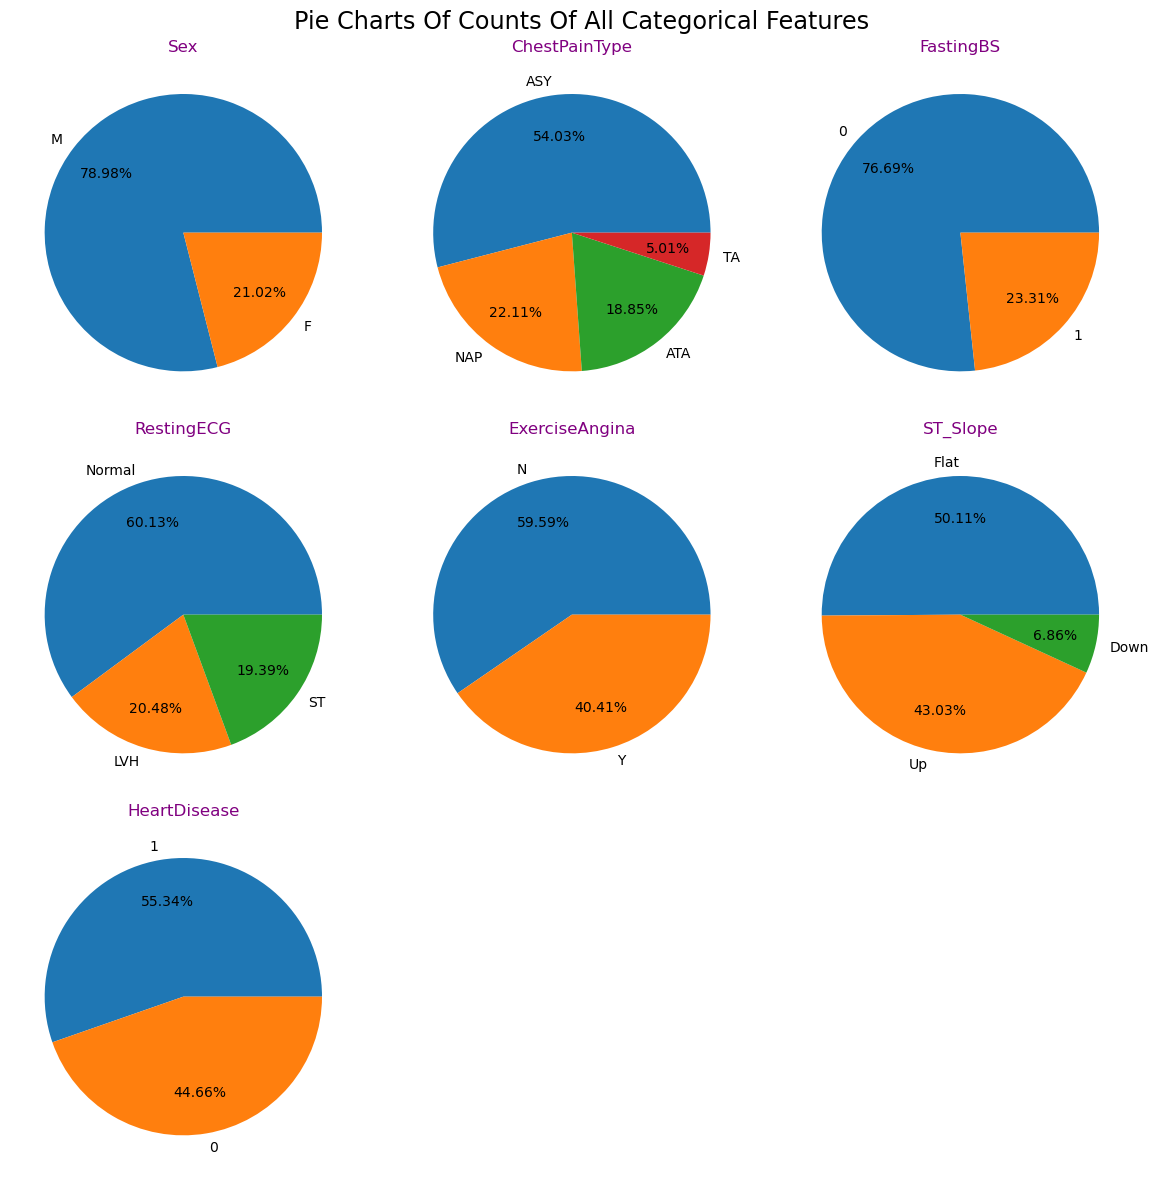

In [136]:
# Define the categorical features
cat_features_names = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope", "HeartDisease"]

fig, axs = plt.subplots(3, 3, figsize =(12,12))

for i, ax in enumerate(axs.flat):
    if i > len(cat_features_names) - 1:
        # This is for 7 and 8 as there is no data
        ax.axis("off")  # Turn off axis if no data
    else:
        ax.pie(x=heart_df[cat_features_names[i]].value_counts(), labels=heart_df[cat_features_names[i]].value_counts().index, autopct="%1.2f%%", pctdistance=0.7)
        ax.set_title(cat_features_names[i], color="purple")

fig.suptitle("Pie Charts Of Counts Of All Categorical Features", size="xx-large")
plt.tight_layout()
plt.show()

## 4a(ii). Observations Of The Pie Charts

- There is significantly more Male participants in the dataset than Female participants.
- Majority of the categorial features do not have the same counts which will be investigated later.
- There is slightly more participants with Heart Disease (55.3%) than without Heart Disease (44.7%), but it is still a well balanced dataset.

# 5. EDA For Numerical Features

## 5a. Pairplot : Without Grouping

Observations Below:
- Most of the numerical data is normally distributed except for Cholesterol which looks like bidmodal distribution (two distinct peaks) which meant that some of the participants did not have their serum cholesterol recorded, which I need to take note in the future analysis using the "Cholesterol" feature.
- "Age" feature is generally on the higher side with a mean of 53.
- "RestingBP" feature has one entry that has a zero value (which most likely meant that that data was not recorded) which I need to investigate later as it is skewing my data.
- "RestingBP" feature is also generally on the higher side with the mean of 132mmHg (120mmHg is normal and 132mmHg is usually stage 1 high blood pressure).
- "MaxHR" feature is also high but it could be due to the heart rate taken during some physical activities (but not explored here and not explained in the dataset information).
- "MaxHR" feature looks like it has a slight hint of bidmodal distribution.
- "Oldpeak" feature is slightly skewed to the right and have some hints of bidmodal distribution.

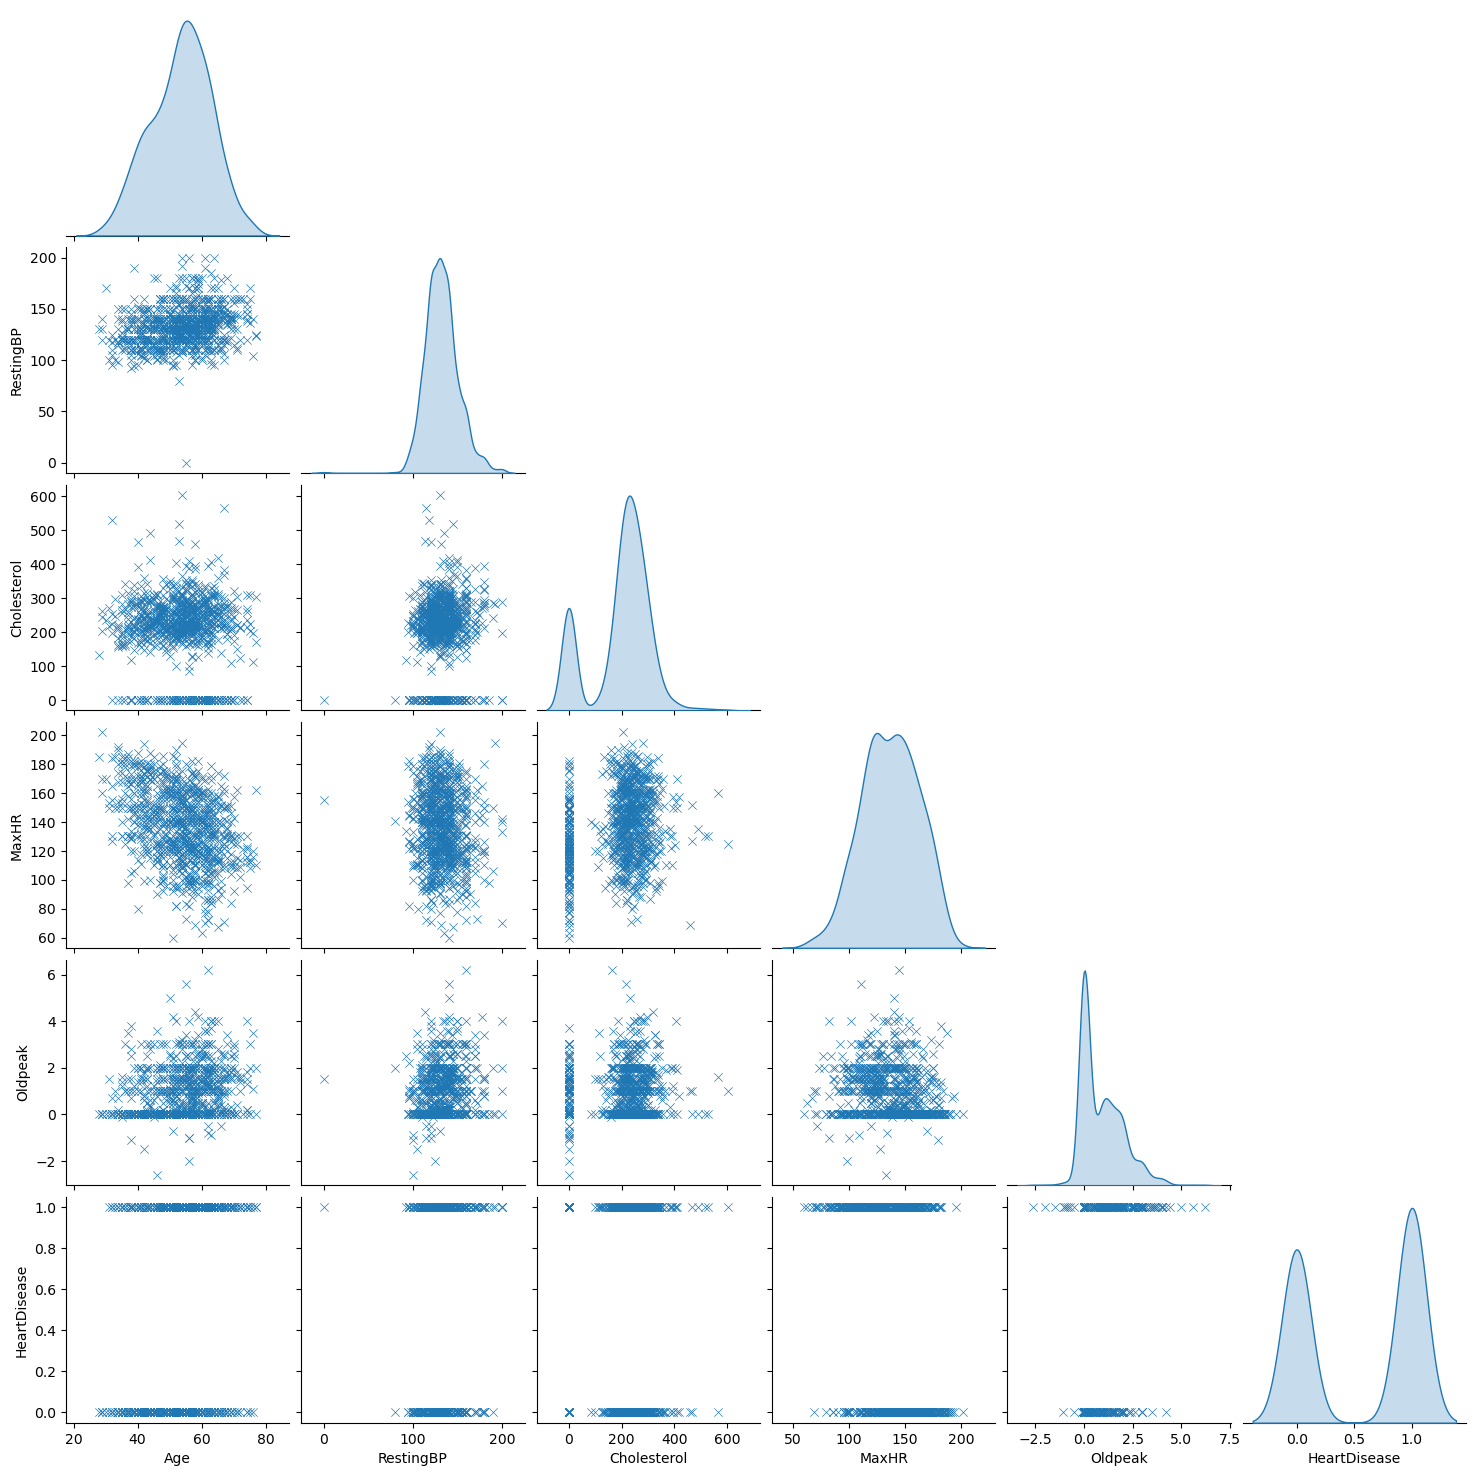

In [285]:
# Using pairplot to compare the numerical features
sns.pairplot(heart_df.drop(labels=["FastingBS"], axis=1, inplace=False), corner=True, markers="x", diag_kind="kde");

### 5a(i). Investigate RestingBP=0

It is clear that this participant did not have his Resting Blood Pressure on admission to the hospital and serum Cholesterol recorded, therefore might need to use other features to predict the presence of Heart Disease or remove this participant from the analysis.

In [304]:
display(heart_df[(heart_df["RestingBP"]==0)])

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
449   55   M           NAP          0            0          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
449    155              N      1.5     Flat             1

### 5a(ii). Investiage Cholesterol=0

Those participants without serum Cholesterol recorded are more likely to display Heart Disease as the mean value (0.88) is significantly more than 0.55 (based on the whole dataset).

In [306]:
display(heart_df[(heart_df["Cholesterol"]==0)])

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
293   65   M           ASY        115            0          0     Normal   
294   32   M            TA         95            0          1     Normal   
295   61   M           ASY        105            0          1     Normal   
296   50   M           ASY        145            0          1     Normal   
297   57   M           ASY        110            0          1         ST   
..   ...  ..           ...        ...          ...        ...        ...   
514   43   M           ASY        122            0          0     Normal   
515   63   M           NAP        130            0          1         ST   
518   48   M           NAP        102            0          1         ST   
535   56   M           ASY        130            0          0        LVH   
536   62   M           NAP        133            0          1         ST   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
293     93              Y      0.0     Flat             1  
294    127              N      0.7       Up             1  
295    110              Y      1.5       Up             1  
296    139              Y      0.7     Flat             1  
297    131              Y      1.4       Up             1  
..     ...            ...      ...      ...           ...  
514    120              N      0.5       Up             1  
515    160              N      3.0     Flat             0  
518    110              Y      1.0     Down             1  
535    122              Y      1.0     Flat             1  
536    119              Y      1.2     Flat             1  

[172 rows x 12 columns]

In [310]:
heart_df[(heart_df["Cholesterol"]==0)].describe().T

count        mean        std   min     25%     50%     75%  \
Age           172.0   56.238372   8.616327  32.0   51.75   57.50   62.00   
RestingBP     172.0  129.680233  22.971558   0.0  115.00  129.00  140.00   
Cholesterol   172.0    0.000000   0.000000   0.0    0.00    0.00    0.00   
FastingBS     172.0    0.517442   0.501155   0.0    0.00    1.00    1.00   
MaxHR         172.0  121.988372  24.166331  60.0  108.00  120.00  138.25   
Oldpeak       172.0    0.825581   1.039645  -2.6    0.00    0.75    1.50   
HeartDisease  172.0    0.883721   0.321495   0.0    1.00    1.00    1.00   

                max  
Age            74.0  
RestingBP     200.0  
Cholesterol     0.0  
FastingBS       1.0  
MaxHR         182.0  
Oldpeak         3.7  
HeartDisease    1.0

### 5a(iii). Explore Oldpeak

It shows that the Oldpeak data is [right skewed](https://medium.com/geekculture/what-are-right-skewed-and-left-skewed-distributions-a29b3def7598), as there is a long tail towards the right side (mean > median > mode).

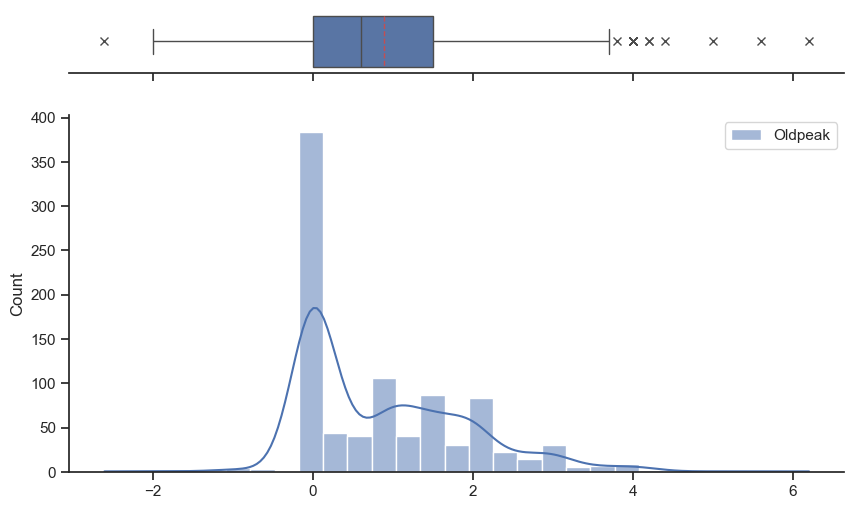

In [316]:
# https://stackoverflow.com/questions/33381330/histogram-with-boxplot-above-in-python

sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10,6))
# Set them to share the x-axis (get from histplot)
# Set the space taken by each plot (15% for boxplot and 85% for histplot)

sns.boxplot(data=heart_df[["Oldpeak"]], ax=ax_box, orient="h", flierprops={"marker": "x"}, showmeans=True, meanline=True, meanprops={"color": "r"})
# Change orient to horizontal
# Show sample mean and make it a red line (previously it is a green triangle)
sns.histplot(data=heart_df[["Oldpeak"]], ax=ax_hist, kde=True)

ax_box.set(yticks=[]) # this is to remove the y axis
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
# Remove the top and right spines from plot(s)

## 5b. Pairplot : Group By Sex

Observations Below:
- For "MaxHR" feature is slightly left skewed for the Female participants, which is the [general trend](https://my.clevelandclinic.org/health/articles/17644-women-and-heart-rate).
- **More** Male participants have Heart Disease than those that do not have, but **Less** Female participants have Heart Disease than those that do not have.

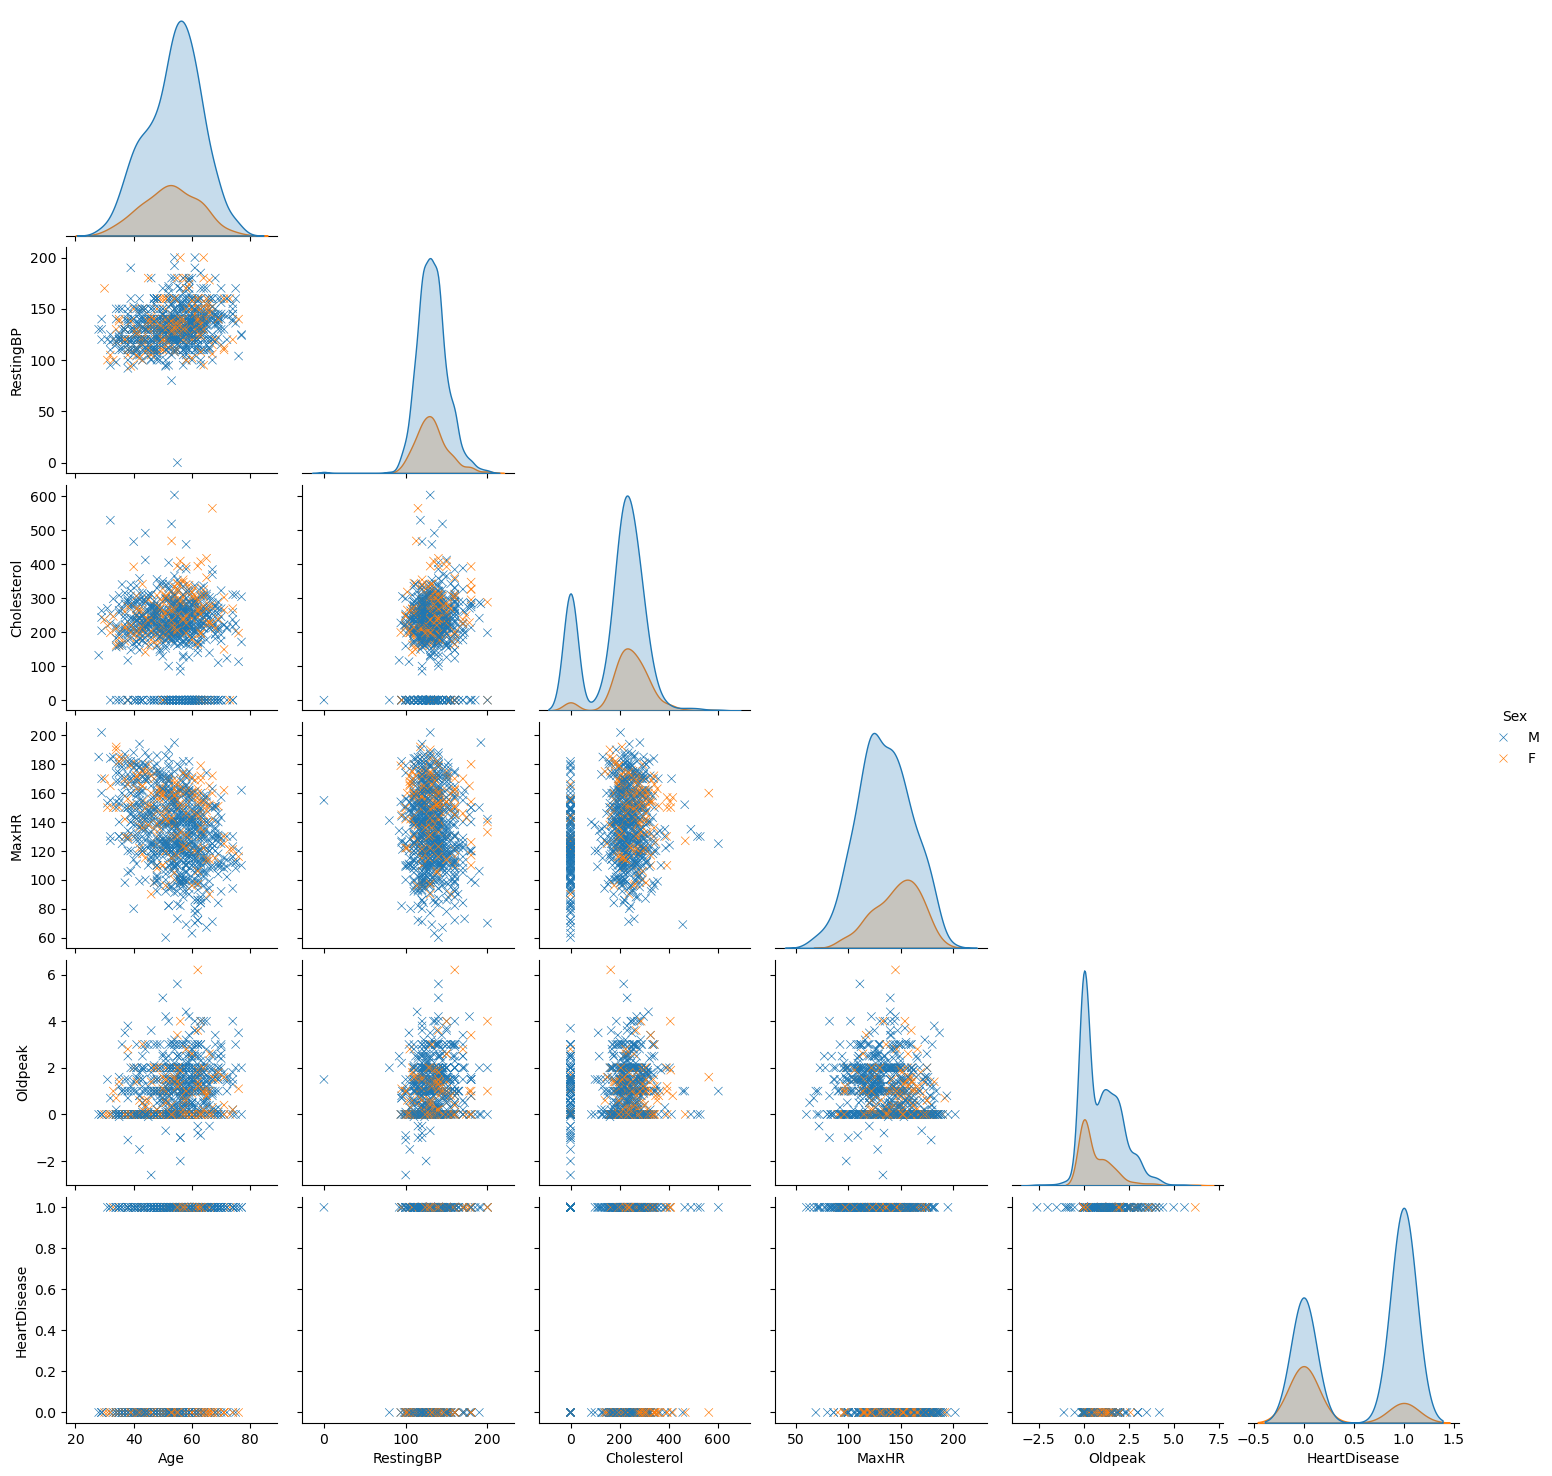

In [262]:
# Using pairplot to compare the numerical features based on the Sex categorical feature
sns.pairplot(heart_df.drop(labels=["FastingBS"], axis=1, inplace=False), corner=True, markers="x", hue="Sex");

## 5c. Pairplot : Group By ChestPainType

Observations Below:
- More "ASY" type for "ChestPainType" feature exhibit higher proportion of "HeartDisease" = 1.

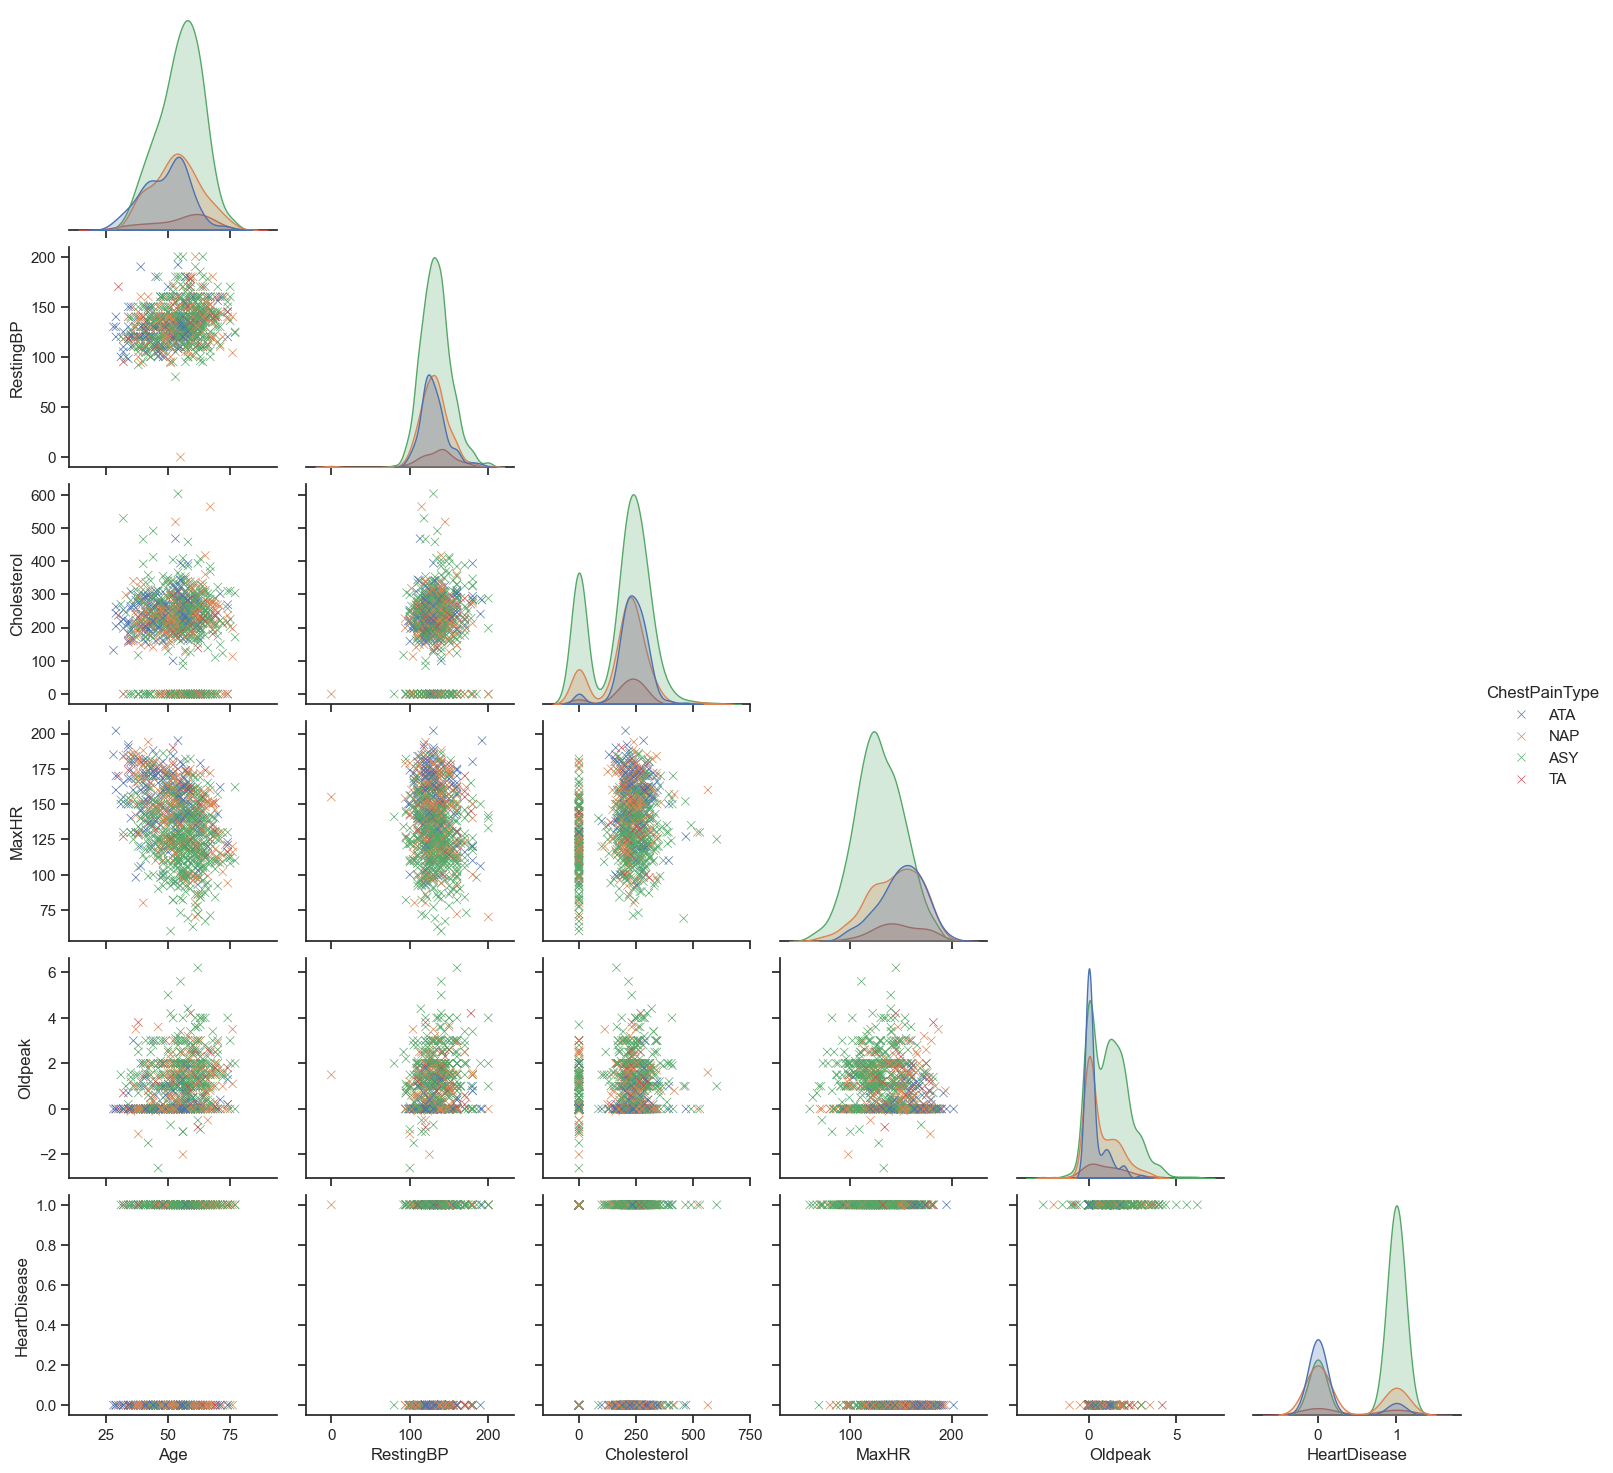

In [322]:
# Using pairplot to compare the numerical features based on the ChestPainType categorical feature
sns.pairplot(heart_df.drop(labels=["FastingBS"], axis=1, inplace=False), corner=True, markers="x", hue="ChestPainType");

## 5d. Pairplot : Group By FastingBS

Observations Below:
- If "FastingBS" = 0, there is au equal chance to have Heart Disease. But if "FastingBS" = 1 (means fasting blood sugar more than 120 mg/dl), there is a significantly higher chance to have Heart Disease.

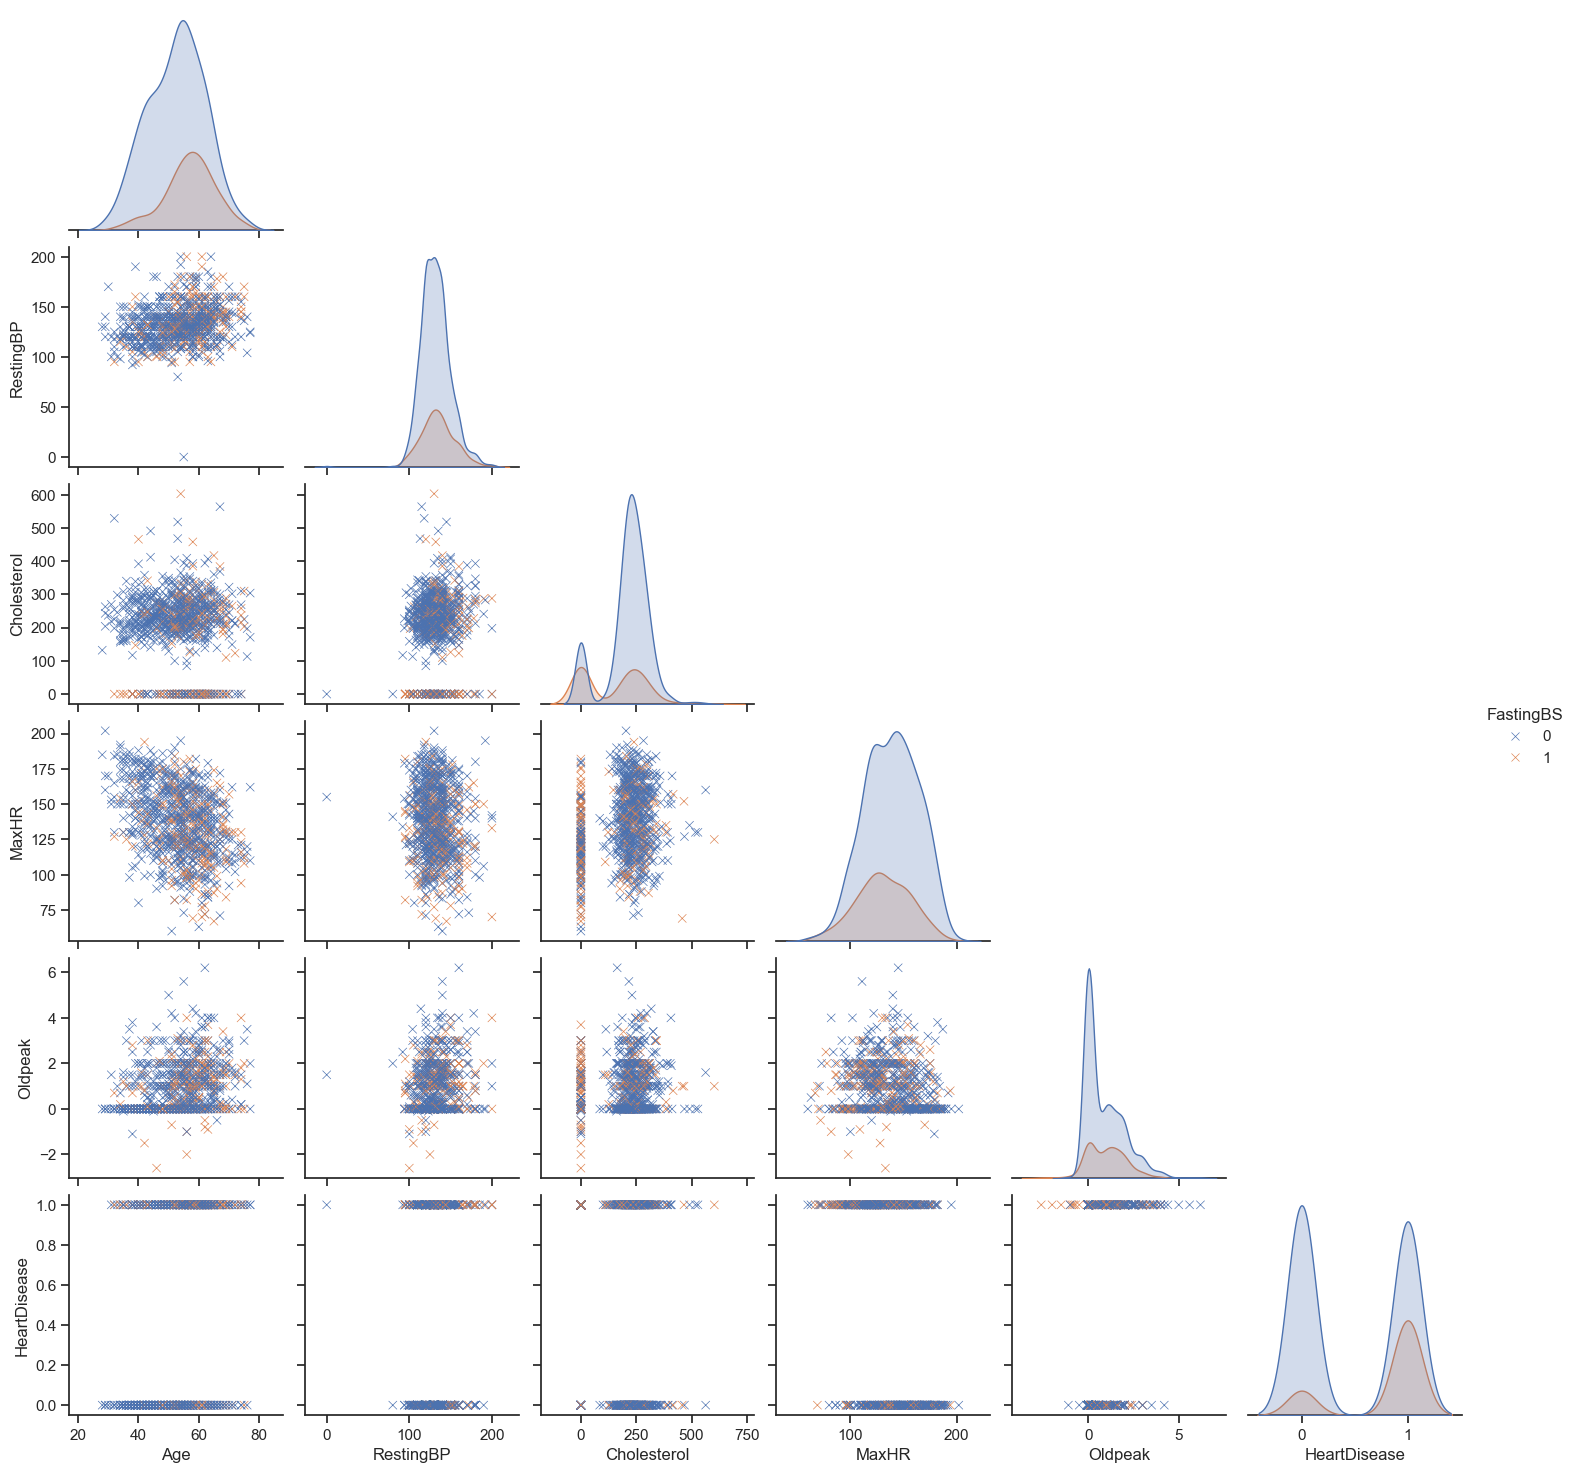

In [332]:
# Using pairplot to compare the numerical features based on the FastingBS categorical feature
sns.pairplot(heart_df, corner=True, markers="x", hue="FastingBS");

## 5e. Pairplot : Group By RestingECG

Observations Below:
- No clear patterns can be observed.

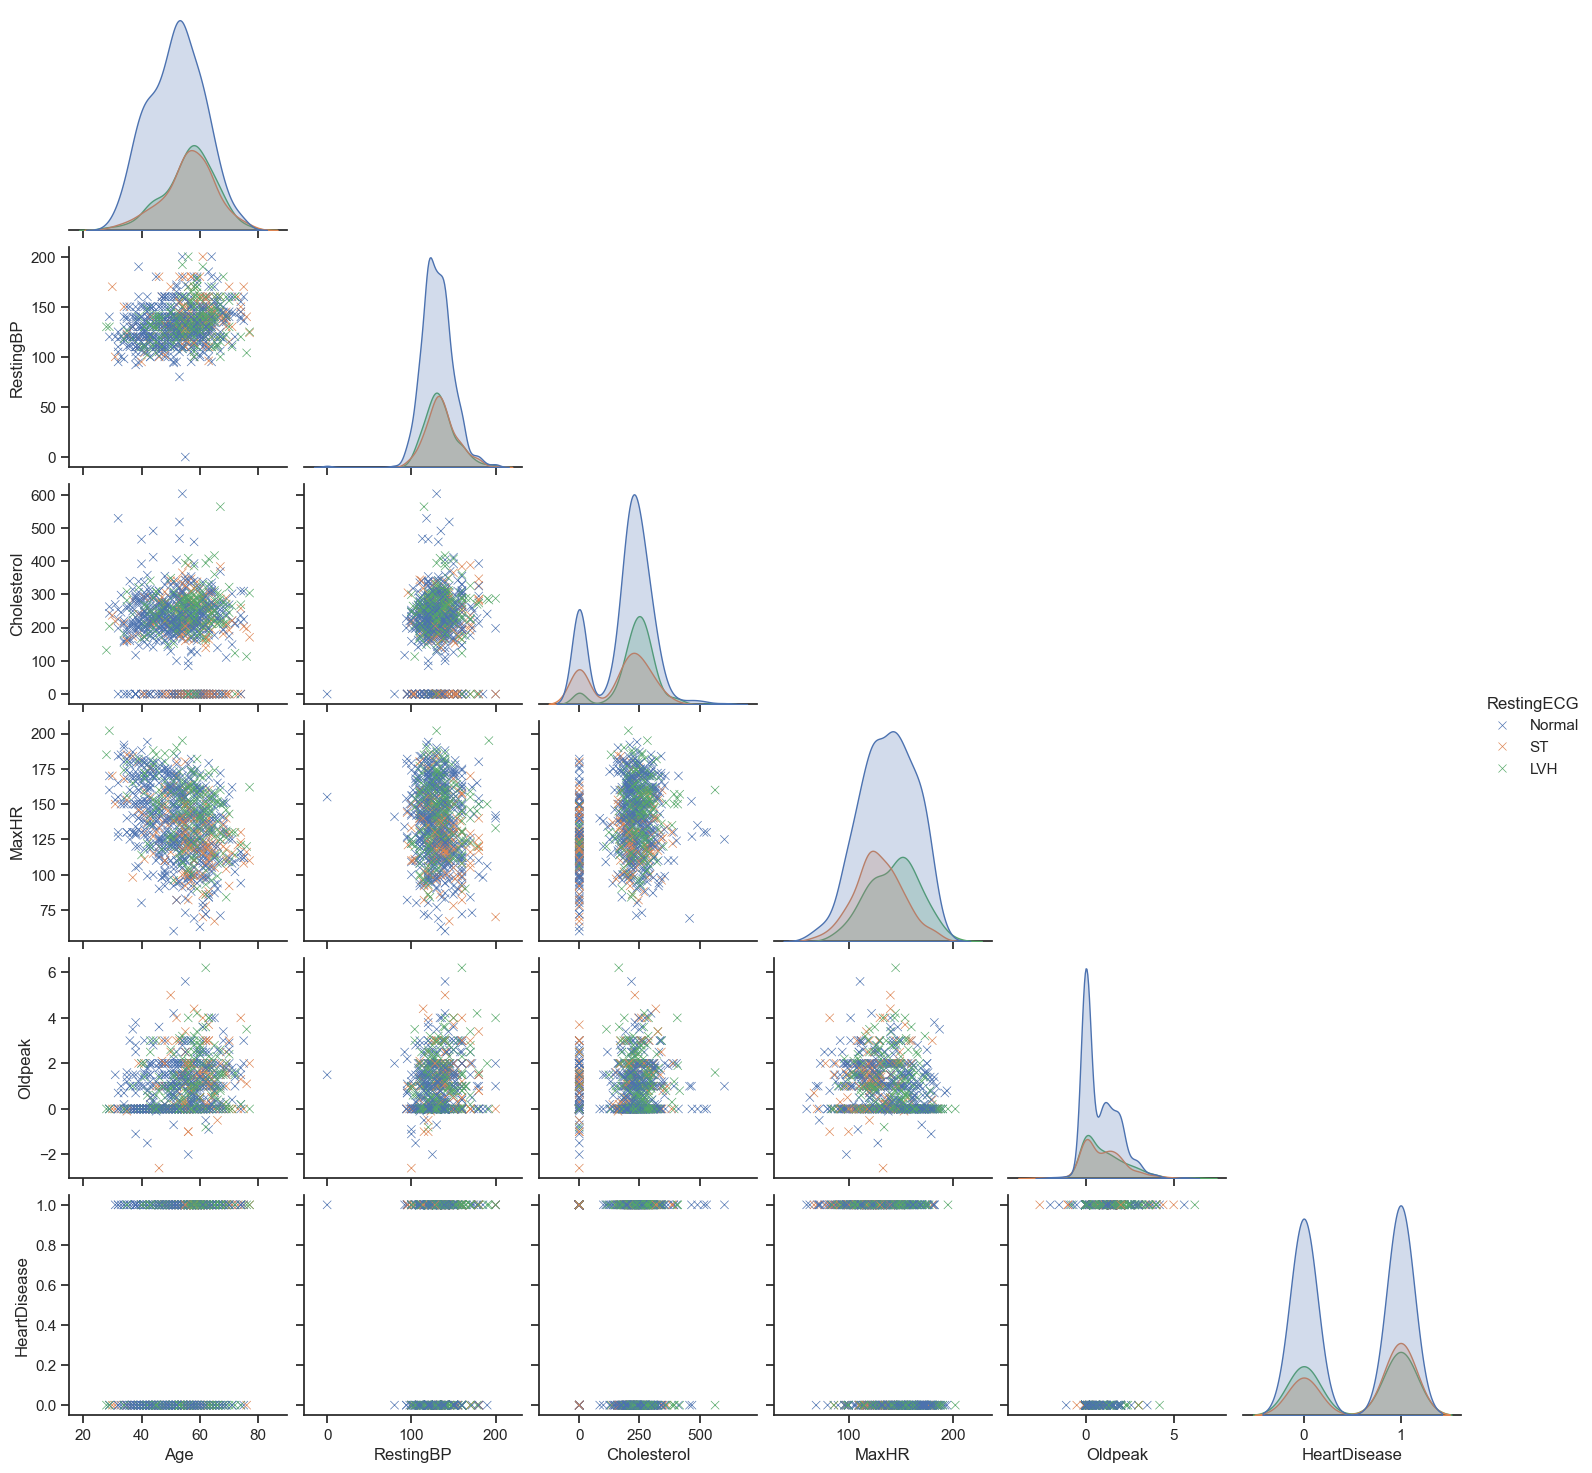

In [335]:
# Using pairplot to compare the numerical features based on the RestingECG categorical feature
sns.pairplot(heart_df.drop(labels=["FastingBS"], axis=1, inplace=False), corner=True, markers="x", hue="RestingECG");

## 5f. Pairplot : Group By ExerciseAngina

Observations Below:
- When "ExerciseAngina" = "N", there is slightly lower chance of having Heart Disease.
- When "ExerciseAngina" = "Y", there is significantly higher change of having Heart Disease.
- When "ExerciseAngina" = "Y", the "MaxHR" feature has a slightly lower mean and it displays the two peaks that are very near to each as observed above (in pairplot without grouping).
- When "ExerciseAngina" = "N", the right skewed "Oldpeak" feature can be observed more clearly. And "ExerciseAngina" = "Y", the "Oldpeak" feature is not as skewed to the right.

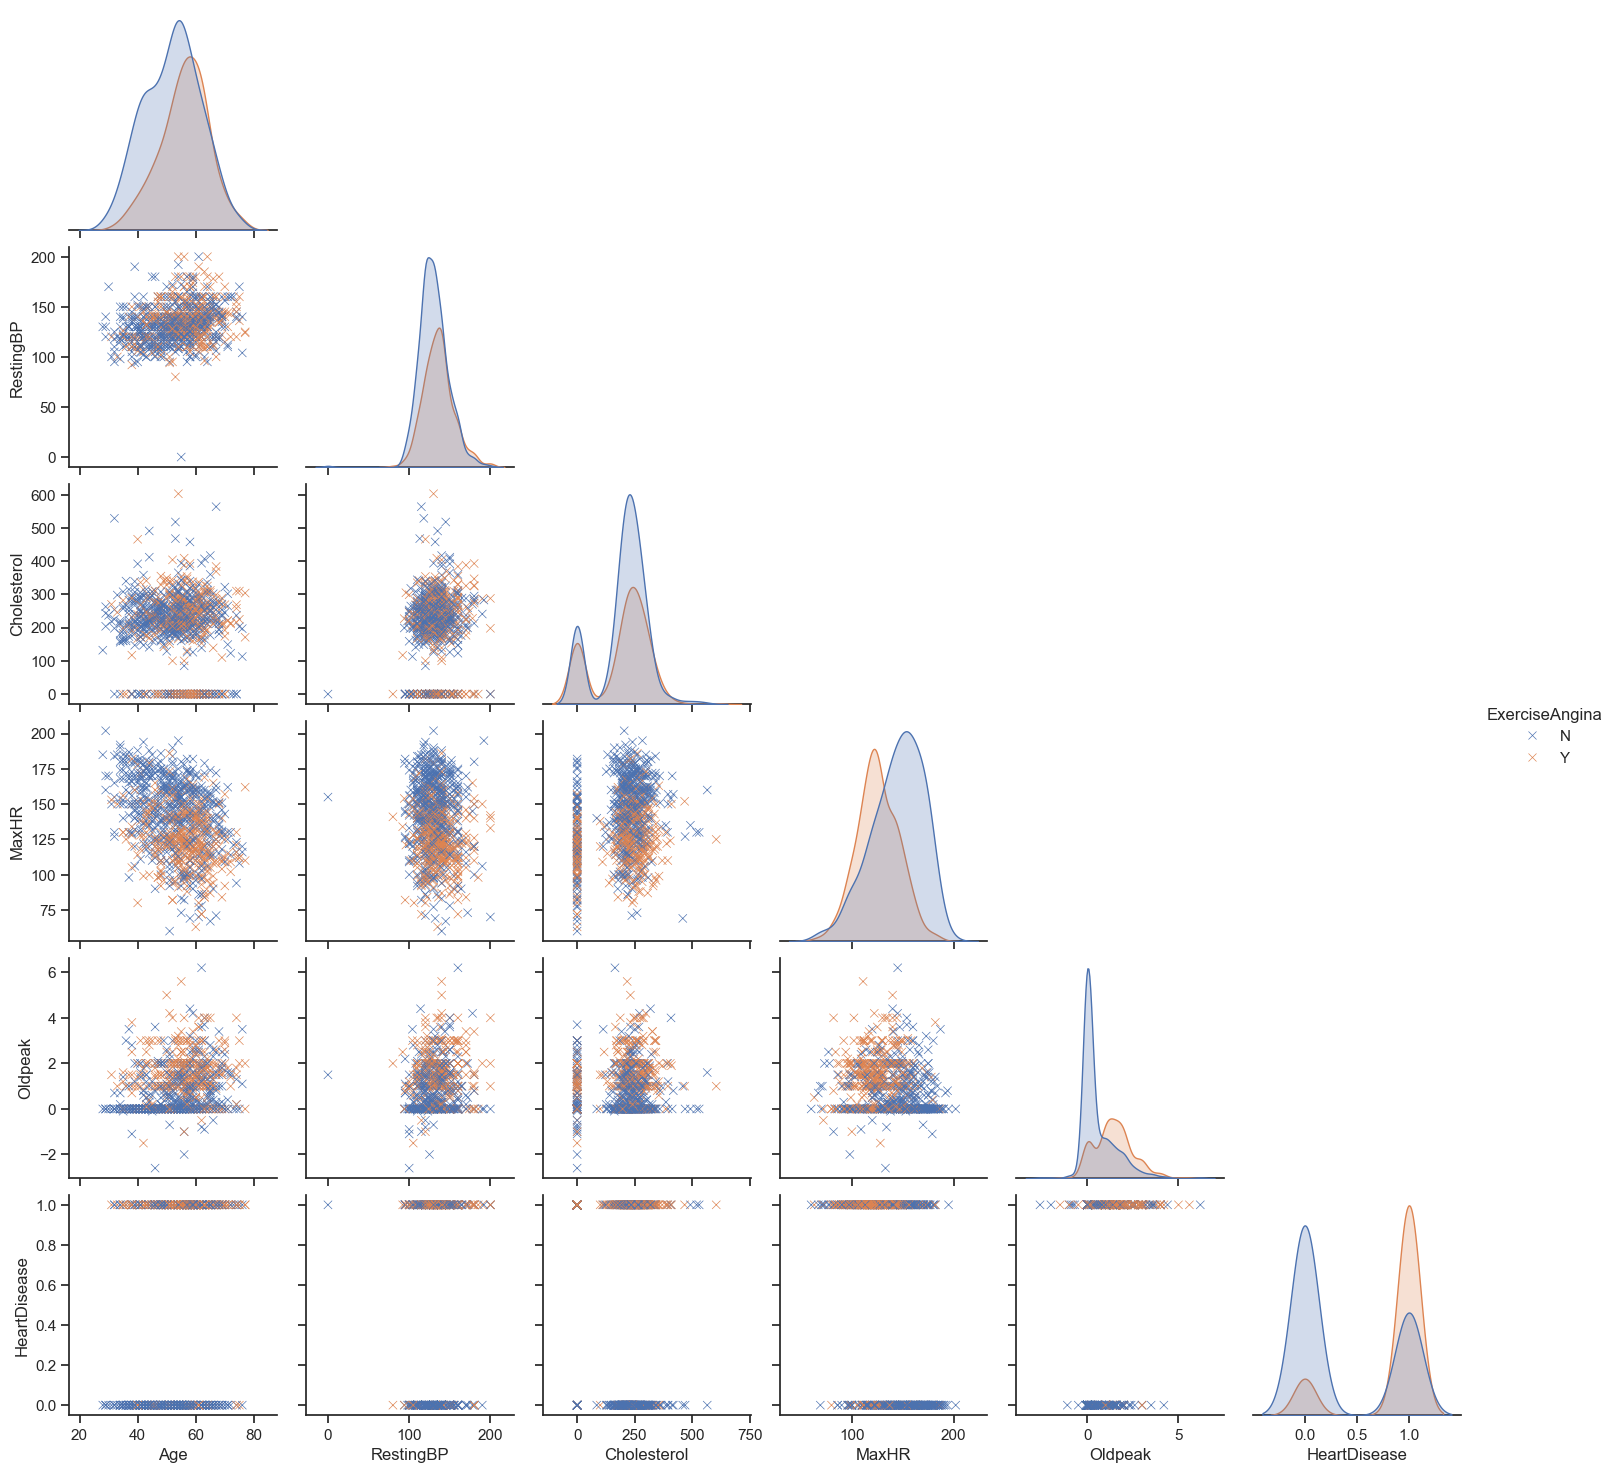

In [339]:
# Using pairplot to compare the numerical features based on the ExerciseAngina categorical feature
sns.pairplot(heart_df.drop(labels=["FastingBS"], axis=1, inplace=False), corner=True, markers="x", hue="ExerciseAngina");

## 5g. Pairplot : Group By ST_Slope

Observations Below:
- When "ST_Slope" = "Up", there is significantly less chance of having Heart Disease.
- When "ST_Slope" = "Flat", there is significantly more chance of having Heart Disease.
- When "ST_Slope" = "Down", there is more chance of having Heart Disease but there is not enough data to visually determine.
- Similar to "RestingECG" above, when "ST_Slope" = "Flat", the data distribution for "MaxHR" and "Oldpeak" features are clearly distinct like the above pattern.

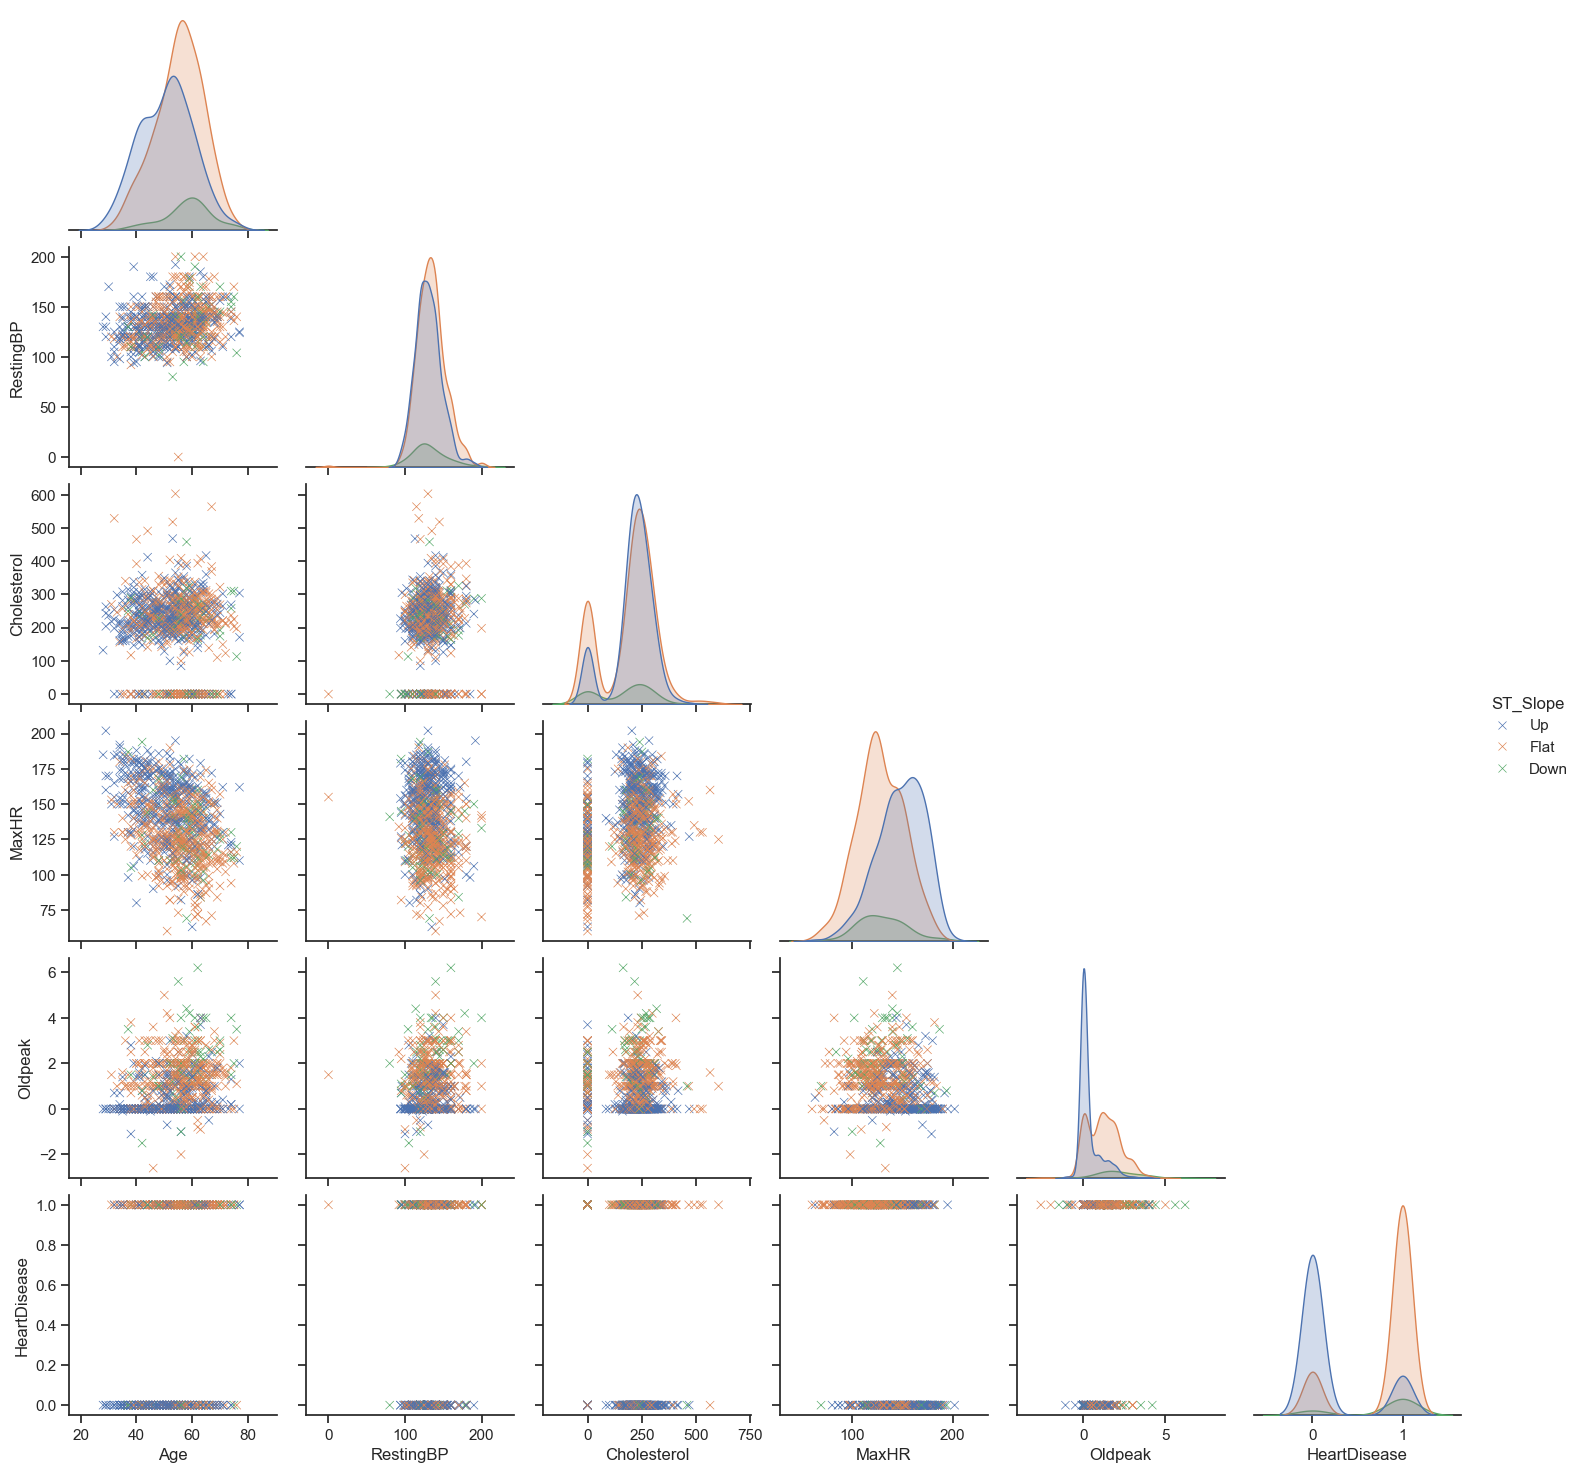

In [342]:
# Using pairplot to compare the numerical features based on the ST_Slope categorical feature
sns.pairplot(heart_df.drop(labels=["FastingBS"], axis=1, inplace=False), corner=True, markers="x", hue="ST_Slope");

# 6. Exploration Of Target Feature (HeartDisease)

In [265]:
# This is the number of participants with (1) and without (0) Heart Disease
print(heart_df["HeartDisease"].value_counts())

HeartDisease
1    508
0    410
Name: count, dtype: int64


## 6a. Bar Chart : Counts By HeartDisease

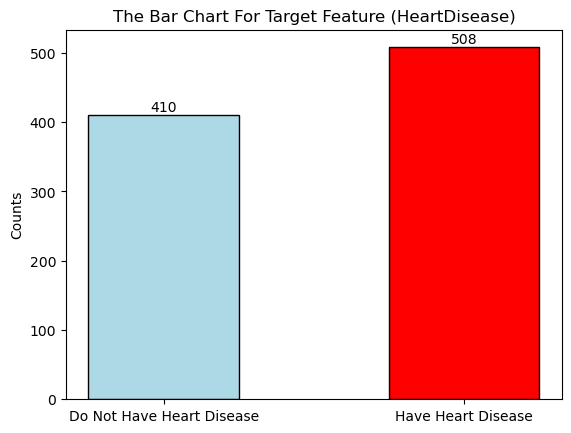

In [269]:
fig = plt.figure(figsize=(6.4,4.8))

plt.bar(x=heart_df["HeartDisease"].value_counts().index, height=heart_df["HeartDisease"].value_counts(), width=0.5, color=["red","lightblue"], edgecolor="black")
for i in range(heart_df["HeartDisease"].value_counts().count()):
    plt.text(x=heart_df["HeartDisease"].value_counts().index[i], y=(heart_df["HeartDisease"].value_counts().values[i]+5), s=heart_df["HeartDisease"].value_counts().values[i], ha = "center")

plt.title("The Bar Chart For Target Feature (HeartDisease)", size="large")
plt.xticks(ticks=heart_df["HeartDisease"].value_counts().index, labels=["Have Heart Disease","Do Not Have Heart Disease"])
plt.ylabel("Counts")
plt.show()

## 6b. Categorical Features VS HeartDisease

### 6b(i). Bar Chart : All Catergorical Features

This is done to better visualized the observations seen in the pairplot above.

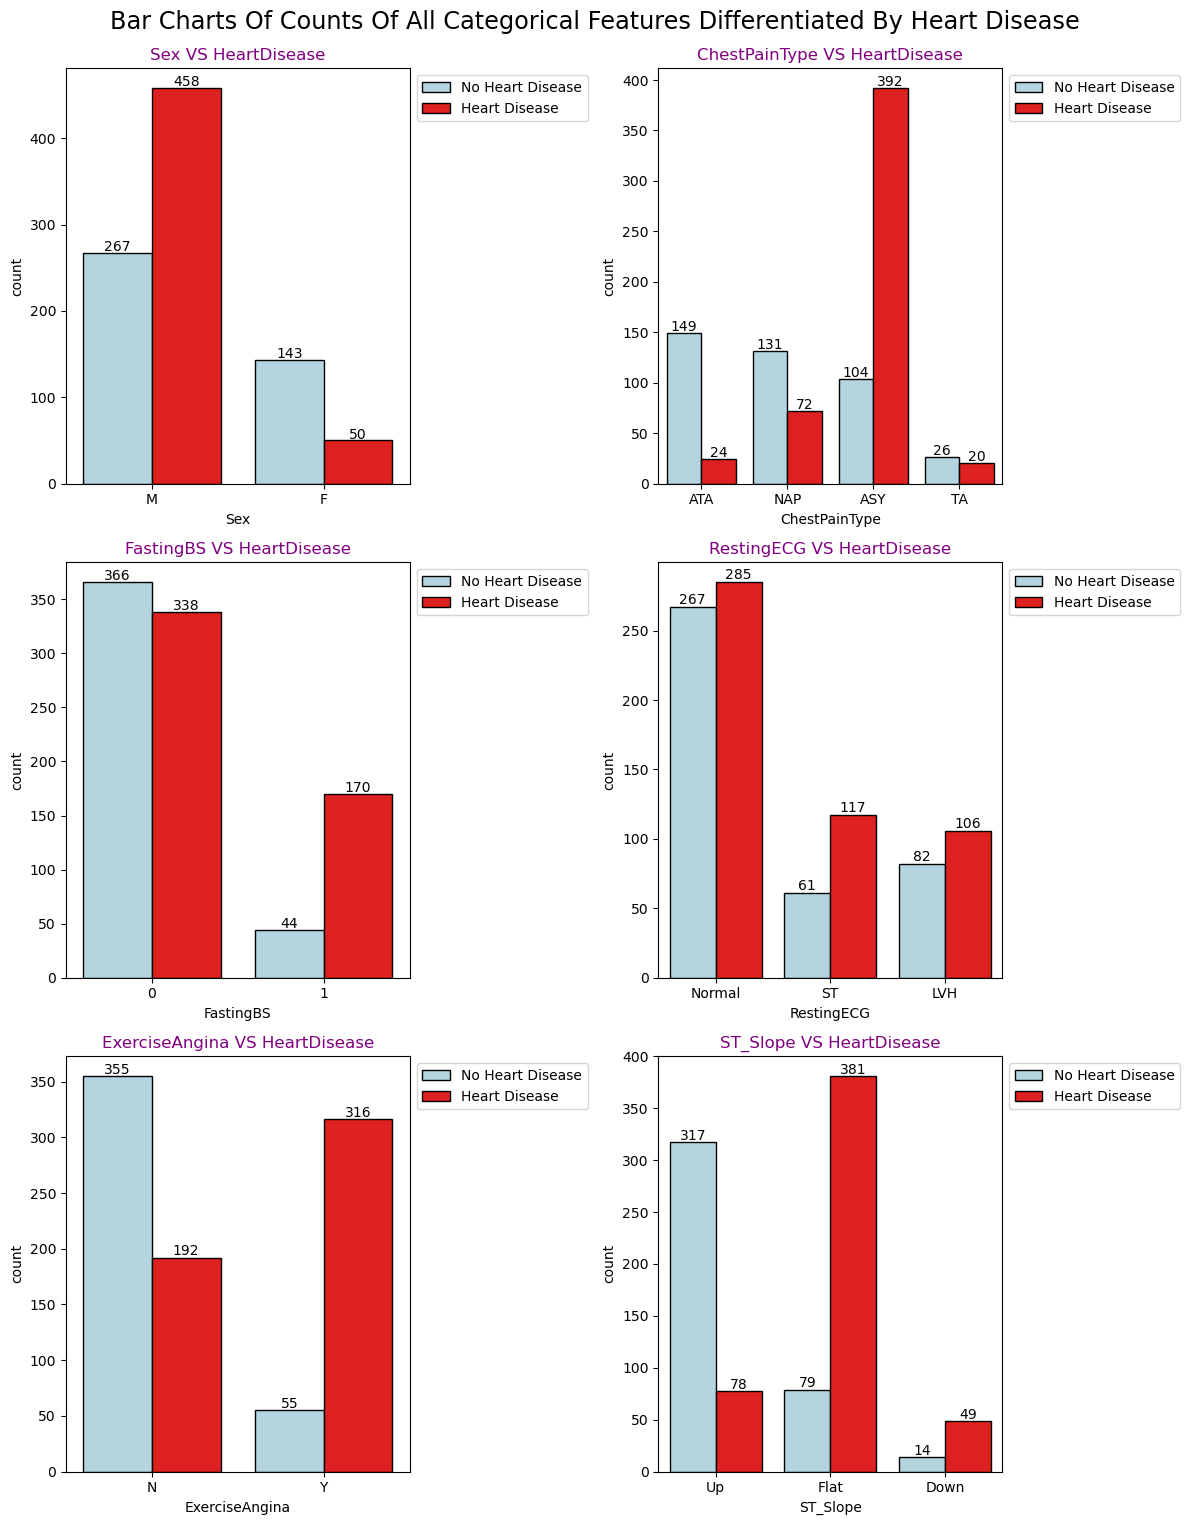

In [166]:
# Define the categorical features
cat_features_names = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope", "HeartDisease"]

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12,16))

for i in range(len(cat_features_names[:-1])): # Remove the last one as "HeartDisease" is the target variable
    plt.subplot(3, 2, i+1)
    ax = sns.countplot(data=heart_df, x=cat_features_names[:-1][i], hue="HeartDisease", palette=["lightblue","red"], edgecolor="black")
    for rect in ax.patches:
        if (rect.get_x() != 0): # To remove some weird zero values from rect.get_x() and rect.get_width() and rect.get_height() and it shows on the plot
            ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, round(rect.get_height()), horizontalalignment="center", fontsize = "medium")
        #print(rect.get_x(), rect.get_width(), rect.get_height())
    plt.legend(["No Heart Disease", "Heart Disease"], bbox_to_anchor=(1, 1), loc="upper left")
    plt.title(cat_features_names[:-1][i] + " VS HeartDisease", color="purple")

fig.suptitle("Bar Charts Of Counts Of All Categorical Features Differentiated By Heart Disease", size="xx-large", y=0.95)  # Adjusted y-value
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjusted top margin
plt.show()

### 6b(ii). Conclusion To The Observations Of The Bar Graphs (And Pairplots)

Observations Above:
- **More Male** participants have Heart Disease than those that do not have. However, **Less Female** participants have Heart Disease than those that do not have.
- Participants that have **Asymptomatic Chest Pain ("ASY")** have a significantly higher chance of having Heart Disease. While participants with other types of Chest Pain have lower chance of having Heart Disease.
- Participants with **Fasting Blood Sugar more than 120 mg/dl ("1")** have a higher chance of having Heart Disease. However, there are more participants with lower Fasting Blood Sugar, and majority of participants with Heart Disease have lower Fasting Blood Sugar.
- "RestingECG" feature does not exhibit an clear visual trends as all participants have a higher chance of having Heart Disease.
- Participants with **Exercised Induced Angina ("Y")** have  a significantly higher chance of having Heart Disease.
- Participants with **"Flat" on "ST_Slope"** have a significantly higher chance of having Heart Disease. Participants with **"Down" on "ST_Slope"** show a similar trend but there are too limit data to make any significance conclusion. Participants with "Up" on "ST_Slope" have a significantly lower chance of having Heart Disease.

## 6c. Categorical Features VS HeartDisease=1

This is done to ensure that the proportion of each categorical features does not change for those with Heart Disease against the full dataset. <br> This also allows me to explore the porportion of each categorical features when the participants having Heart Disease.

### 6c(i). Pie Chart: All Categorical Features

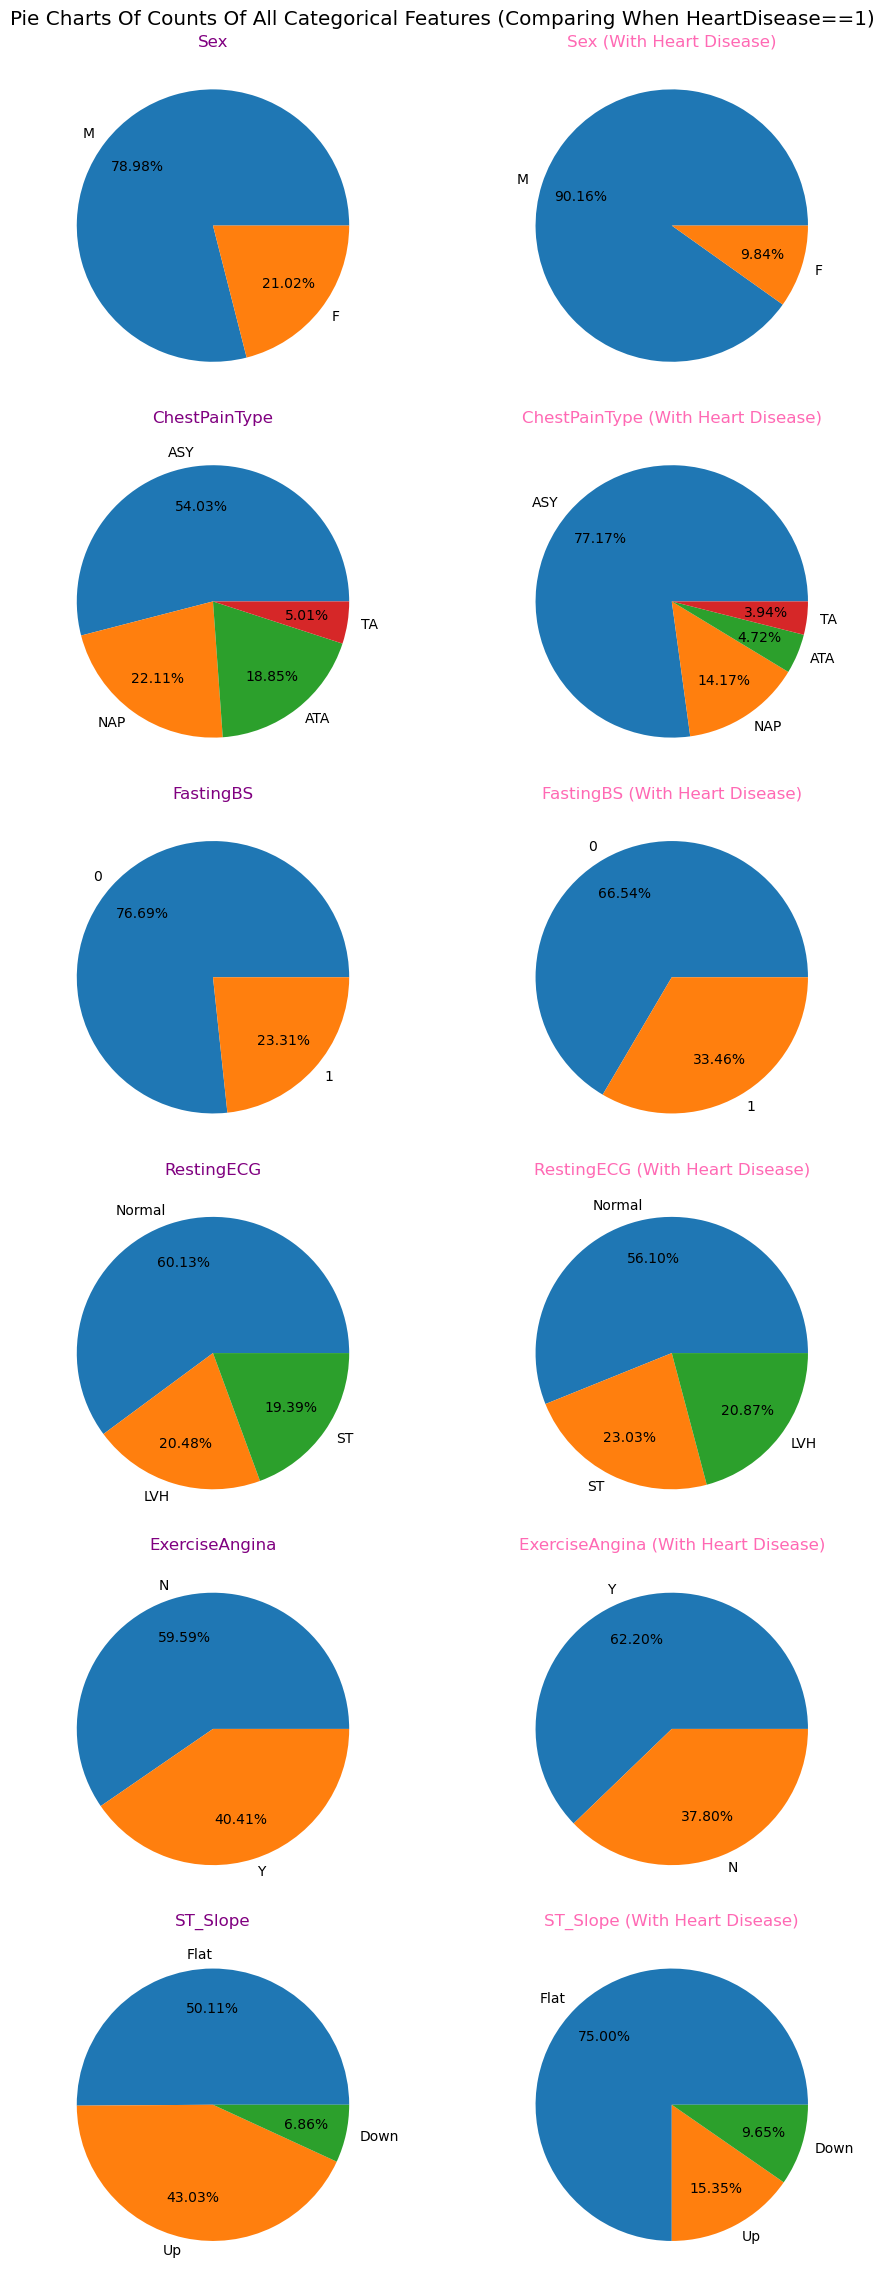

In [298]:
# Define the categorical features
cat_features_names = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope", "HeartDisease"]

# Define a new dataframe with only participants with Heart Disease
heart_df_positive = heart_df[heart_df["HeartDisease"]==1]

fig, axs = plt.subplots(len(cat_features_names[:-1]), 2, figsize =(10,24))

for i, ax in enumerate(axs.flat):
    if i %2 == 0: # For plotting the left side
        i = int(i / 2) # To ensure the right feature is plotted and have to be integer for list slicing
        ax.pie(x=heart_df[cat_features_names[i]].value_counts(), labels=heart_df[cat_features_names[i]].value_counts().index, autopct="%1.2f%%", pctdistance=0.7)
        ax.set_title(cat_features_names[i], color="purple")
    else:
        i = int((i - 1) / 2) # To ensure the right feature is plotted and have to be integer for list slicing
        ax.pie(x=heart_df_positive[cat_features_names[i]].value_counts(), labels=heart_df_positive[cat_features_names[i]].value_counts().index, autopct="%1.2f%%", pctdistance=0.7)
        ax.set_title(cat_features_names[i] + " (With Heart Disease)", color="hotpink")

fig.suptitle("Pie Charts Of Counts Of All Categorical Features (Comparing When HeartDisease==1)", size="x-large", y=0.95)  # Adjusted y-value
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjusted top margin
plt.show()